In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
# !unzip book-crossings.zip
# !mkdir data
# !mv *.csv data

--2023-07-20 14:28:39--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  50.0MB/s    in 0.5s    

2023-07-20 14:28:40 (50.0 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
# !rm book-crossings.zip

In [4]:
books_filename = 'data/BX-Books.csv'
ratings_filename = 'data/BX-Book-Ratings.csv'

In [5]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

# Data exploration

## Books dataset

In [6]:
df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [7]:
df_books.describe()

,isbn,title,author
count,271379,271379,271378
unique,271379,242154,102042
top,0195153448,Selected Poems,Agatha Christie
freq,1,27,632


In [8]:
df_books.isna().sum()

isbn      0
title     0
author    1
dtype: int64

In [9]:
df_books[df_books.author.isna()]

,isbn,title,author
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN


In [10]:
df_books.dropna(inplace=True)

In [11]:
df_books.duplicated().sum()

0

In [12]:
df_books.author.value_counts()

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
                      ... 
Carson Mc Cullers        1
Boissard                 1
Norris Houghton          1
Alain Layrac             1
Christopher  Biffle      1
Name: author, Length: 102042, dtype: int64

## Ratings dataset

In [13]:
df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [14]:
df_ratings.describe()

,user,rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [15]:
df_ratings.isna().sum()

user      0
isbn      0
rating    0
dtype: int64

In [16]:
df_ratings.duplicated().sum()

0

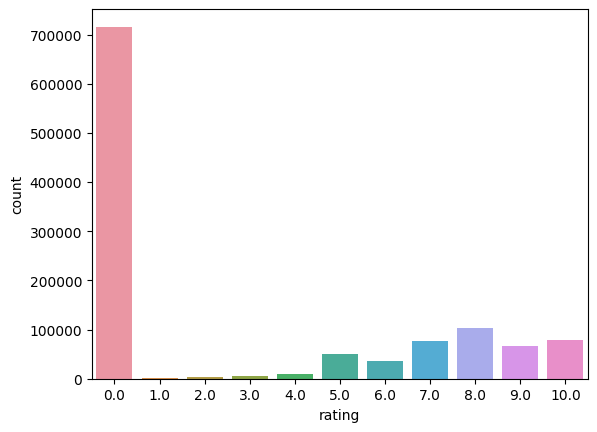

In [17]:
sns.countplot(x = "rating", data = df_ratings);

In [32]:
# We see that there is a lot of 0 ratings. 

## Get clean data

In [20]:
df = df_ratings

In [21]:
users_count = df["user"].value_counts()
books_count = df["isbn"].value_counts()

In [22]:
# For statistics purpose, it's better to move books with less than 100 reviews and users with less than 200 reviews. 
users_to_keep = users_count[users_count >= 200].index
books_to_keep = books_count[books_count >= 100].index

In [23]:
df = df[df["user"].isin(users_to_keep)]
df = df[df["isbn"].isin(books_to_keep)]

In [24]:
df = df.merge(df_books, on="isbn")

In [25]:
df_pivot = df.pivot_table(index='title', columns='user', values='rating')
df_pivot.fillna(0, inplace=True)
df_pivot

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Without Remorse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning

In [26]:
model_nn = NearestNeighbors(metric="cosine")

In [27]:
matrix_csr = csr_matrix(df_pivot.values)

In [28]:
model_nn.fit(matrix_csr)

NearestNeighbors(metric='cosine')

In [29]:
distances, indices = model_nn.kneighbors(df_pivot.loc["The Queen of the Damned (Vampire Chronicles (Paperback))"].values.reshape(1, -1), 
                                         n_neighbors=6)

In [30]:
nested_list = []
for i in range(6):
    nested_list.append([df_pivot.iloc[indices[0][i]].name, distances[0][i]])

In [31]:
sorted(nested_list, key=lambda x: x[1], reverse=True)

[['Catch 22', 0.7939835],
 ['The Witching Hour (Lives of the Mayfair Witches)', 0.74486566],
 ['Interview with the Vampire', 0.73450685],
 ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.53763384],
 ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.51784116],
 ['The Queen of the Damned (Vampire Chronicles (Paperback))', 5.9604645e-08]]

In [30]:
def get_recommends(book = ""):
    """
    Give a book and it will return the five most recommended books with their 
    distances
    """
    distances, indices = model_nn.kneighbors(df_pivot.loc[book].values.reshape(1, -1),
                                             n_neighbors=6)
    nested_list = []
    for i in range(6):
        nested_list.append([df_pivot.iloc[indices[0][i]].name, distances[0][i]])
    nested_list.pop(0)
    nested_list = sorted(nested_list, key=lambda x: x[1], reverse=True)
    recommended_books = [book,
                         nested_list]
    return recommended_books

In [31]:
get_recommends(book = "Where the Heart Is (Oprah's Book Club (Paperback))")

["Where the Heart Is (Oprah's Book Club (Paperback))",
 [["I'll Be Seeing You", 0.8016211],
  ['The Weight of Water', 0.77085835],
  ['The Surgeon', 0.7699411],
  ['I Know This Much Is True', 0.7677075],
  ['The Lovely Bones: A Novel', 0.7234864]]]